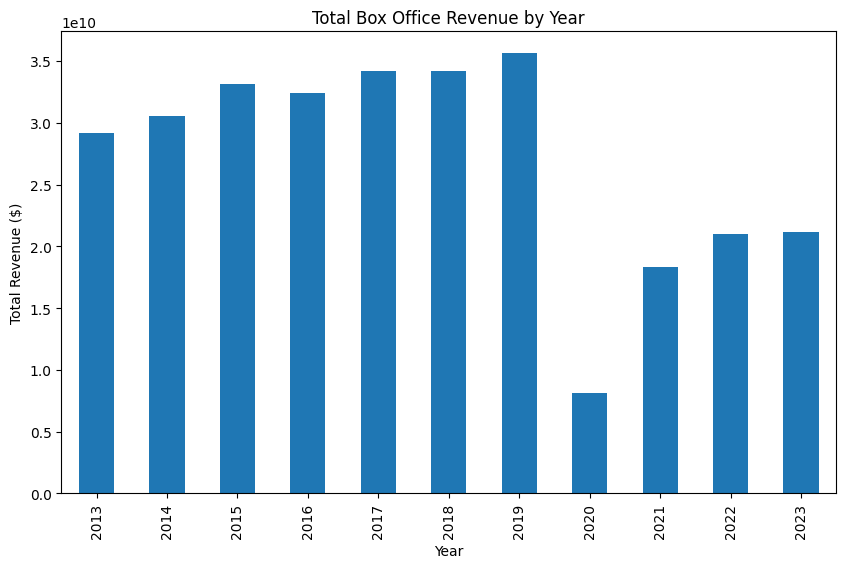

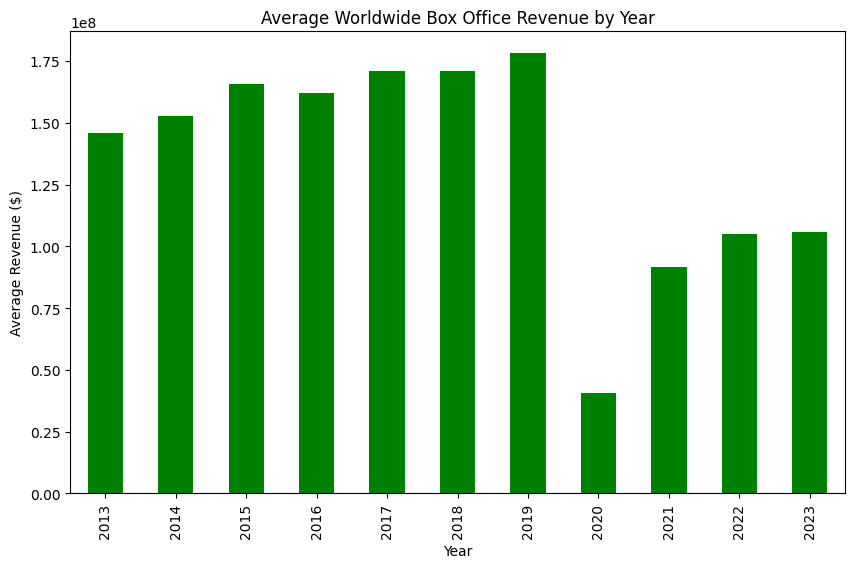

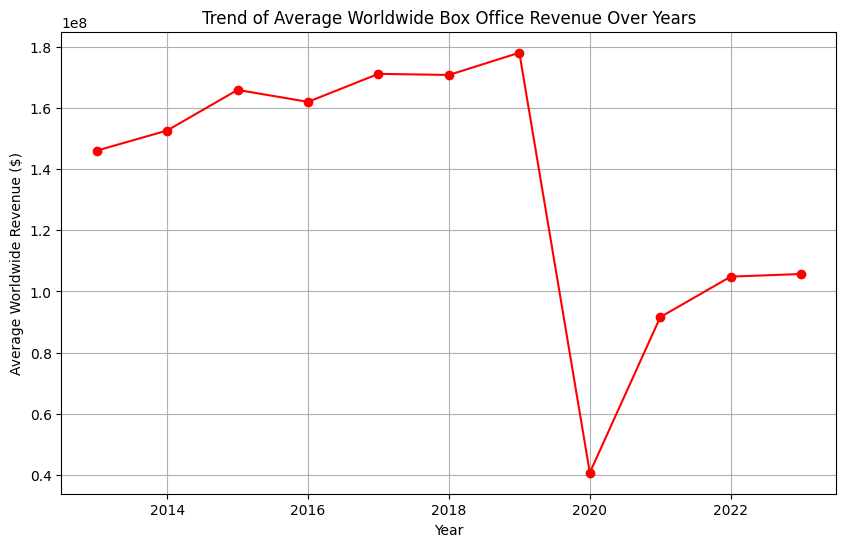

<Figure size 1000x600 with 0 Axes>

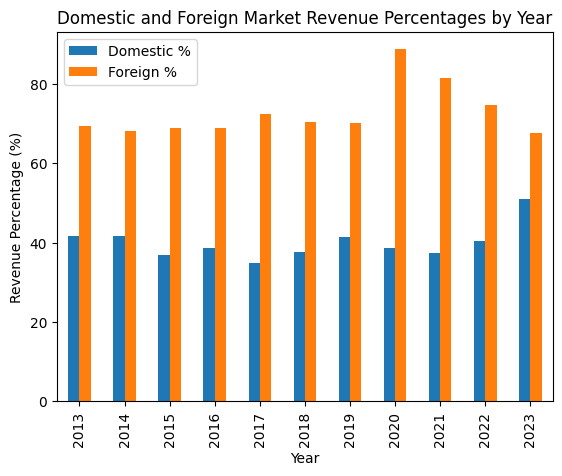

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('box_office_2013_2023.csv')

# Replace '-' with NaN
data.replace('-', np.nan, inplace=True)

# Remove '$' and ',' from 'Worldwide', 'Domestic', 'Foreign' columns and convert to float
data['Worldwide'] = data['Worldwide'].replace('[\$,]', '', regex=True).astype(float)
data['Domestic'] = data['Domestic'].replace('[\$,]', '', regex=True).astype(float)
data['Foreign'] = data['Foreign'].replace('[\$,]', '', regex=True).astype(float)

# Remove '%' character and convert to float
# Replace unconvertible values with NaN
data['Domestic %'] = pd.to_numeric(data['Domestic %'].replace('%', '', regex=True), errors='coerce')
data['Foreign %'] = pd.to_numeric(data['Foreign %'].replace('%', '', regex=True), errors='coerce')


# Visualizing total box office revenue by year
plt.figure(figsize=(10, 6))
data.groupby('Year')['Worldwide'].sum().plot(kind='bar')
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.show()

# Visualizing Average 'Worldwide' revenue by year
avg_revenue_by_year = data.groupby('Year')['Worldwide'].mean()
plt.figure(figsize=(10, 6))
avg_revenue_by_year.plot(kind='bar', color='green')
plt.title('Average Worldwide Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($)')
plt.show()

# Visualizing Trend of average 'Worldwide' revenue over years
plt.figure(figsize=(10, 6))
avg_revenue_by_year.plot(kind='line', color='red', marker='o')
plt.title('Trend of Average Worldwide Box Office Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Revenue ($)')
plt.grid(True)
plt.show()

# Visualizing domestic and foreign market revenue percentages by year
plt.figure(figsize=(10, 6))
data.groupby('Year')[['Domestic %', 'Foreign %']].mean().plot(kind='bar')
plt.title('Domestic and Foreign Market Revenue Percentages by Year')
plt.xlabel('Year')
plt.ylabel('Revenue Percentage (%)')
plt.legend(['Domestic %', 'Foreign %'])
plt.show()
